In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Plotting Exercise

Walker position: 33 27


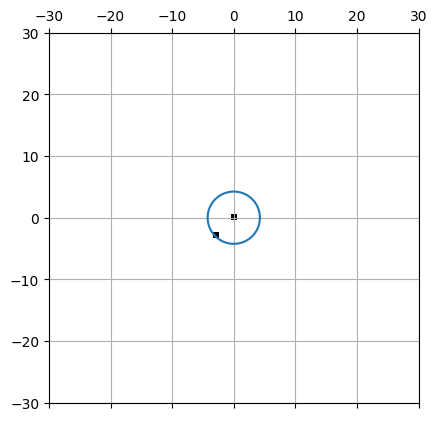

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lattice
lattice_dim = 30

# RNG
rng = np.random.default_rng()

# Define the meshgrid
x = np.arange(-lattice_dim, lattice_dim+1, 1)
X, Y = np.meshgrid(x, x)
R_for_shape = X**2 + Y**2

# Define radius function
def R(x, y, axis_halfsize):
    rad = np.sqrt((x - axis_halfsize)**2 + (y - axis_halfsize)**2)
    return rad

# Defining the radii
rmax = 1  # still one pixel wide
rdiff = np.ceil((3/2)*rmax)       # diffusion radius
rkill = np.ceil(rdiff + (1/2)*rmax)  # kill radius

# Plant aggregation area
agg_area = np.zeros(R_for_shape.shape)

# Center of lattice
center = lattice_dim

# Controlled random initialization: walker starts within kill radius of seed
offset_y, offset_x = rng.integers(low=-rkill, high=rkill+1, size=2)
pos_y = center + offset_y
pos_x = center + offset_x

# Clip to lattice bounds
pos_y = np.clip(pos_y, 0, 2*lattice_dim)
pos_x = np.clip(pos_x, 0, 2*lattice_dim)

# Place walker
agg_area[pos_y, pos_x] = 1

# For visualization
fig, ax = plt.subplots()
r_samp = R(pos_x, pos_y, lattice_dim)

# Plant a seed in the middle
agg_area[center, center] = 1

th = np.linspace(0, 2*np.pi, 100)
ax.plot(r_samp*np.cos(th), r_samp*np.sin(th))
ax.matshow(agg_area, extent=[-lattice_dim, lattice_dim, -lattice_dim, lattice_dim], cmap="binary")
ax.grid(True)

print("Walker position:", pos_y, pos_x)

## Random Walk

In [2]:
# Randomly generate points
def generate_initial_position(max_index, rmax, rd, rkill):
    while True:
        center = lattice_dim
        offset_y, offset_x = rng.integers(low=-rkill, high=rkill+1, size=2)
        pos_y = int(center + offset_y)
        pos_x = int(center + offset_x)
        if not (0 <= pos_x < 2*max_index + 1 and 0 <= pos_y < 2*max_index + 1):
            return generate_initial_position(max_index, rmax, rd, rkill)
        if R_for_shape[pos_x, pos_y] < rmax:
            # you're too close to the aggregate to simulate diffusion!
            pass
        elif R_for_shape[pos_x, pos_y] < rd:
            # close enough that you can do random walk (step to adjacent cell)
            return pos_x, pos_y, R_for_shape[pos_x, pos_y], "rwalk"
        elif R_for_shape[pos_x, pos_y] < rkill:
            # a bit far, so simulate diffusion with a larger step size
            return pos_x, pos_y, R_for_shape[pos_x, pos_y], "brown"
        else:
            # I'm too far from the aggregate and may never even reach it,
            # might as well try another starting position to save time.
            pass

# Act depending on the result
def next_hop(curr_x, curr_y, max_index, rmax, rd, rkill):
    dist = R[curr_x, curr_y]

    if dist < rd:
        # Random walk zone: single-step moves
        sequence = [
            (curr_x - 1, curr_y), (curr_x + 1, curr_y),
            (curr_x, curr_y - 1), (curr_x, curr_y + 1)
        ]
        curr_x_new, curr_y_new = rng.choice(sequence)
        pos_x, pos_y = int(curr_x_new), int(curr_y_new)

        if not (0 <= pos_x < 2*max_index + 1 and 0 <= pos_y < 2*max_index + 1):
            pos_x, pos_y, _, _ = generate_initial_position(max_index, rmax, rd, rkill)
        return pos_x, pos_y

    elif dist < rkill:
        # Brownian motion zone: modest hop size
        k = rng.integers(low=2, high=5)
        th_rand = rng.choice(np.linspace(0, 2*np.pi, 100))
        curr_x_new = int(curr_x + k*np.cos(th_rand))
        curr_y_new = int(curr_y + k*np.sin(th_rand))
        pos_x, pos_y = curr_x_new, curr_y_new

        if not (0 <= pos_x < 2*max_index + 1 and 0 <= pos_y < 2*max_index + 1):
            pos_x, pos_y, _, _ = generate_initial_position(max_index, rmax, rd, rkill)
        return pos_x, pos_y

    else:
        # Outside kill radius: regenerate walker
        pos_x, pos_y, _, _ = generate_initial_position(max_index, rmax, rd, rkill)
        if not (0 <= pos_x < 2*max_index + 1 and 0 <= pos_y < 2*max_index + 1):
            pos_x, pos_y, _, _ = generate_initial_position(max_index, rmax, rd, rkill)
        return pos_x, pos_y

In [5]:
# For illustration,
# For illustration only: pick 5 random starting points
for i in range(5):
    print(generate_initial_position(150, rmax, rdiff, rkill))

NameError: name 'rmax' is not defined

## Building the fractal

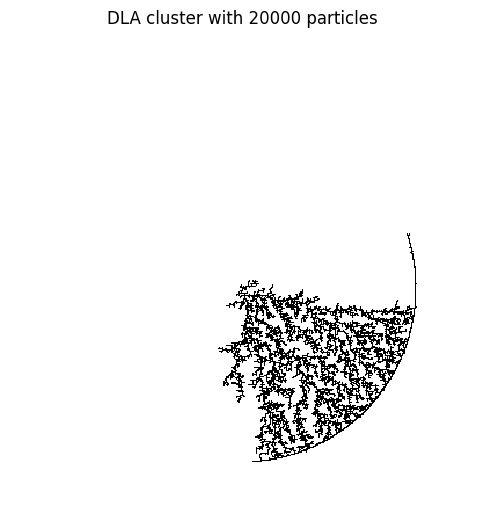

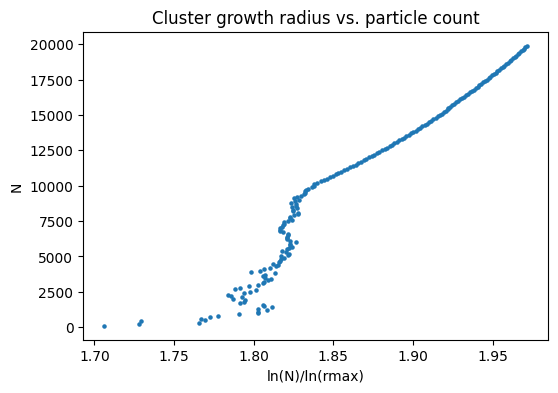

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lattice
lattice_dim = 200
rng = np.random.default_rng()

# Define the meshgrid
x = np.arange(-lattice_dim, lattice_dim+1, 1)
X, Y = np.meshgrid(x, x)
R_for_shape = np.sqrt(X**2 + Y**2)  # radial distance array

# Radii
rmax_real = 1
rdiff_real = 10
rkill_real = 100

# Aggregation area
agg_area = np.zeros(R_for_shape.shape)
center = lattice_dim
agg_area[center, center] = 1

# Helper: generate initial walker near kill radius
def generate_initial_position(max_index, rmax, rdiff, rkill):
    angle = rng.uniform(0, 2*np.pi)
    pos_x = int(max_index + rkill*np.cos(angle))
    pos_y = int(max_index + rkill*np.sin(angle))
    return pos_x, pos_y, R_for_shape[pos_x, pos_y], "init"

# Hop function
def next_hop(curr_x, curr_y, max_index, rmax, rd, rkill):
    dist = R_for_shape[curr_x, curr_y]
    if dist < rd:
        # single-step moves
        sequence = [
            (curr_x-1, curr_y), (curr_x+1, curr_y),
            (curr_x, curr_y-1), (curr_x, curr_y+1)
        ]
        pos_x, pos_y = rng.choice(sequence)
        return int(pos_x), int(pos_y)
    elif dist < rkill:
        # modest Brownian hops
        k = rng.integers(low=2, high=4)
        th_rand = rng.uniform(0, 2*np.pi)
        pos_x = int(curr_x + k*np.cos(th_rand))
        pos_y = int(curr_y + k*np.sin(th_rand))
        return pos_x, pos_y
    else:
        # regenerate walker
        pos_x, pos_y, _, _ = generate_initial_position(max_index, rmax, rd, rkill)
        return pos_x, pos_y

# Simulation
stick_count = 1
target_particles = 20000
radii_history, counts_history = [], []

while stick_count < target_particles:
    pos_x, pos_y, _, _ = generate_initial_position(lattice_dim, rmax_real, rdiff_real, rkill_real)
    stuck = False
    while not stuck:
        neighbors = [
            (pos_x-1, pos_y), (pos_x+1, pos_y),
            (pos_x, pos_y-1), (pos_x, pos_y+1)
        ]
        if any(agg_area[nx, ny] == 1 for nx, ny in neighbors):
            agg_area[pos_x, pos_y] = 1
            rmax_real = max(rmax_real, R_for_shape[pos_x, pos_y])
            if stick_count % 100 == 0:
                radii_history.append(rmax_real)
                counts_history.append(stick_count)
            # keep diffusion modest, kill large
            rdiff_real = 15
            rkill_real = 10*rdiff_real
            stick_count += 1
            stuck = True
        else:
            pos_x, pos_y = next_hop(pos_x, pos_y, lattice_dim, rmax_real, rdiff_real, rkill_real)

# Plot cluster
plt.figure(figsize=(6,6))
plt.matshow(agg_area, cmap="binary", fignum=1)
plt.title(f"DLA cluster with {stick_count} particles")
plt.axis("off")
plt.savefig("DLA.pdf")
plt.show()


# Diagnostic plot
plt.figure(figsize=(6,4))
plt.scatter(np.log(counts_history)/np.log(radii_history), counts_history, s=5)
plt.xlabel("ln(N)/ln(rmax)")
plt.ylabel("N")
plt.title("Cluster growth radius vs. particle count")
plt.savefig("Clusterfuck.pdf")
plt.show()


        
        
            


